# Detection and Diagnosis of Heart Disease

### Task

<div class="alert alert-block alert-success">A client in the health sector has approached to run a proof of concept – they want to use our expertise on data-driven decision making to improve their detection and diagnosis of heart disease. They are interested to know how data, analytics, and in particular machine learning can help them
    

      1.	Detect at risk patients at a low per-patient cost

      2.	Diagnose heart disease as “well” as possible

The client hopes to work through the problem together – but they’ve given a sample of their data for us to illustrate what our expertise can deliver for them. 

They don’t expect our work to be perfect nor comprehensive, but we hope convey understanding of the problem, the data, and a rough solution to the early detection and accurate diagnosis of heart disease.</div> 


### Dataset

<div class="alert alert-block alert-success">They have provided us a dataset of <b>303 past patients.</b> Each patient has several measurements that might be relevant at predicting heart disease. They have also provided an expert assessment of whether each of patient had a heart condition. 

The dataset can be found at: https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1#heart.csv </div>


### Load dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, Normalizer
from IPython.core.display import HTML
%matplotlib inline

sns.set_style('white')

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

### Importing and Understanding Our Dataset

In [2]:
df = pd.read_csv('heart.csv')

### Shape of dataset

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div class="alert alert-block alert-success">We have 13 features in our data set and target column is our target which indicates if a person has disease or not.</div>

### Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<div class="alert alert-block alert-success">When we check the data set, all features are <b>numeric</b> so we do not need to apply any encoding technique here. 
    Additionaly, there is <b>no missing value</b> so we do not need any imputation which is used for dealing with missing values.</div>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<div class="alert alert-block alert-success">As seen above table, for all fetaures max value is less than 1000, if we use <b>int16</b> instead of int64 we will reduce memory size. For this small df, it may not be an issue but working with large dataset i really matters.</div> 

In [7]:
columns = df.columns
columns = list(columns)
columns.remove('oldpeak')

In [8]:
for col in columns:
    df[col] = df[col].astype('int16')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int16
sex         303 non-null int16
cp          303 non-null int16
trestbps    303 non-null int16
chol        303 non-null int16
fbs         303 non-null int16
restecg     303 non-null int16
thalach     303 non-null int16
exang       303 non-null int16
oldpeak     303 non-null float64
slope       303 non-null int16
ca          303 non-null int16
thal        303 non-null int16
target      303 non-null int16
dtypes: float64(1), int16(13)
memory usage: 10.1 KB


<div class="alert alert-block alert-success">The memory usage is reduced <b>from 33KB to 10KB</b></div>

### Checking for duplicates and dropping them (if any)

In [10]:
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.drop_duplicates(inplace = True)
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<div class="alert alert-block alert-success">The duplicate row dropped</div>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int16
sex         302 non-null int16
cp          302 non-null int16
trestbps    302 non-null int16
chol        302 non-null int16
fbs         302 non-null int16
restecg     302 non-null int16
thalach     302 non-null int16
exang       302 non-null int16
oldpeak     302 non-null float64
slope       302 non-null int16
ca          302 non-null int16
thal        302 non-null int16
target      302 non-null int16
dtypes: float64(1), int16(13)
memory usage: 12.4 KB


### Dataset Columns (features)

In [13]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

##### age: The person's age in years 
##### sex: The person's sex (1 = male, 0 = female) 
##### cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
##### trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
##### chol: The person's cholesterol measurement in mg/dl
##### fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
##### restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
##### thalach: The person's maximum heart rate achieved
##### exang: Exercise induced angina (1 = yes; 0 = no)
##### oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
##### slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
##### ca: The number of major vessels (0-3)
##### thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
##### target: Heart disease (0 = no, 1 = yes)

## Exploratory Data Analysis (EDA)

### Analysing the 'target' variable

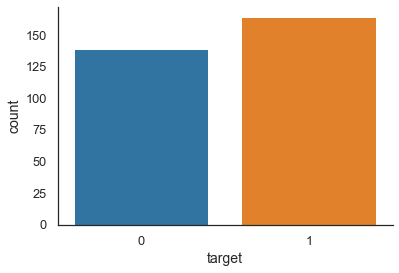

In [14]:
sns.set_context('poster', font_scale=0.8)
sns.countplot(x='target', data=df);
sns.despine()

In [15]:
target_temp = df['target'].value_counts()
target_temp

1    164
0    138
Name: target, dtype: int64

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/302,2)))
print("Percentage of patience with heart problems   : "+str(round(target_temp[1]*100/302,2)))

Percentage of patience without heart problems: 45.7
Percentage of patience with heart problems   : 54.3


<div class="alert alert-block alert-success">The dependent variable is a little bit imbalanced in favor of class 1 (with disease)</div>

### Checking Correlation Between Columns

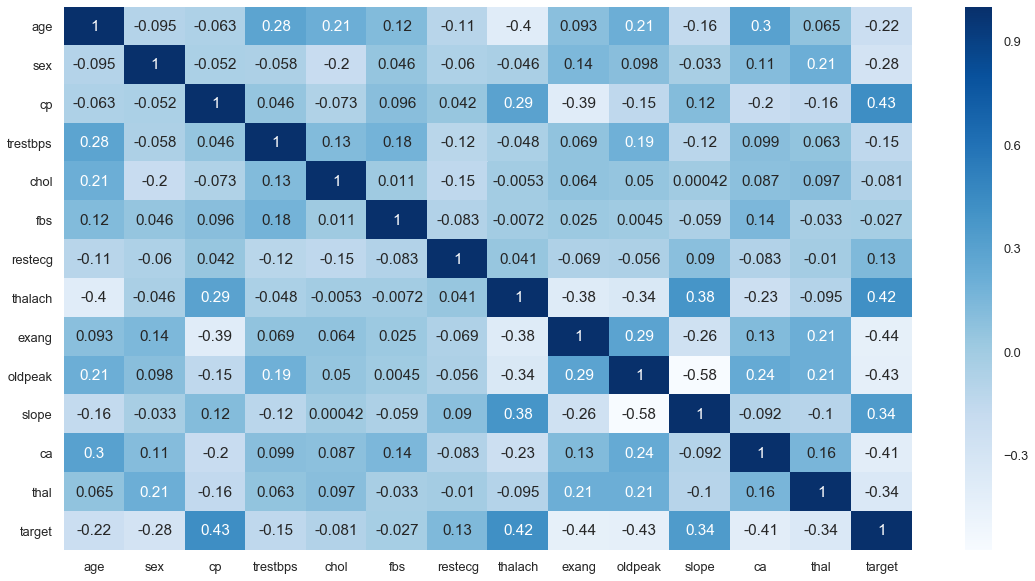

In [17]:
# Finding correalation between features
fig,ax = plt.subplots(figsize=(19,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues" ,ax=ax)
plt.show()

In [18]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


<div class="alert alert-block alert-success">It shows that most features are moderately correlated with target, but <b>'fbs', 'chol' and 'restecg'</b> features are pretty weakly correlated.</div>

### We will analyse some features

### Analysing the 'sex' feature

In [19]:
male_count = df.sex.value_counts().tolist()[0]
female_count = df.sex.value_counts().tolist()[1]
print('Male :',male_count)
print('Female :',female_count)

Male : 206
Female : 96


In [20]:
df["sex"].unique()

array([1, 0], dtype=int64)

#### As expected, the 'sex' feature has 2 unique features 

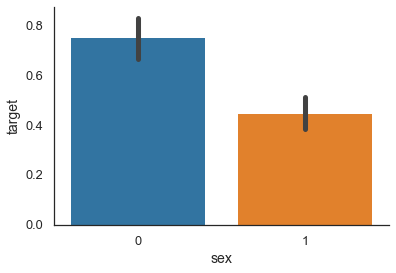

In [21]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(df["sex"], df['target'])
sns.despine()

<div class="alert alert-block alert-success">It shows that females are more likely to have heart problems than males.</div>

### Analysing the 'Chest Pain Type' feature

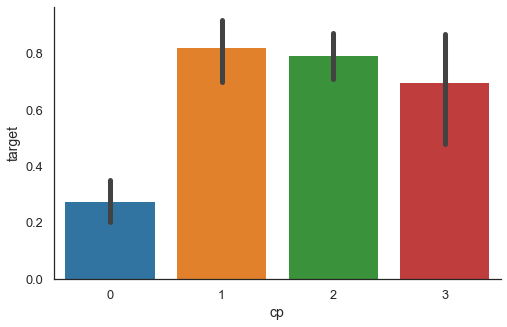

In [22]:
fig = plt.subplots(figsize=(8,5))
sns.barplot(df["cp"], df['target']);
sns.despine()

<div class="alert alert-block alert-success">It shows that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems</div>

### Analysing the 'FBS' feature

In [23]:
df["fbs"].value_counts()

0    257
1     45
Name: fbs, dtype: int64

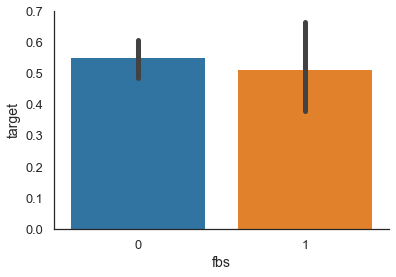

In [24]:
fig = plt.subplots(figsize=(6,4))
sns.barplot(df["fbs"], df['target'])
sns.despine()

<div class="alert alert-block alert-success">It shows that there is nothing extraordinary</div>

### Analysing the 'restecg' feature

In [25]:
df["restecg"].unique()

array([0, 1, 2], dtype=int64)

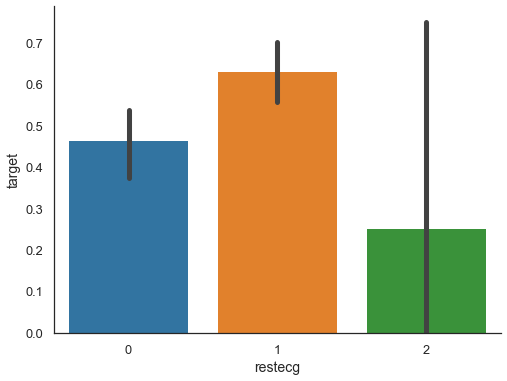

In [26]:
fig = plt.subplots(figsize=(8,6))
sns.barplot(df["restecg"], df['target'])
sns.despine()

<div class="alert alert-block alert-success">It shows that people with restecg '1' and '0' are much more likely to have a heart problem than with restecg '2'</div>

### Analysing the 'exang' feature

In [27]:
df["exang"].value_counts()

0    203
1     99
Name: exang, dtype: int64

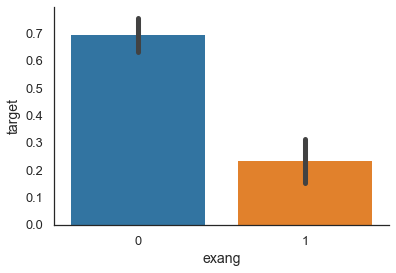

In [28]:
fig = plt.subplots(figsize=(6,4))
sns.barplot(df["exang"], df['target']);
sns.despine()

<div class="alert alert-block alert-success">It shows that people with exang=1 i.e. exercise induced angina are much less likely to have heart problems</div>

### Analysing the 'slope' feature

In [29]:
df["slope"].unique()

array([0, 2, 1], dtype=int64)

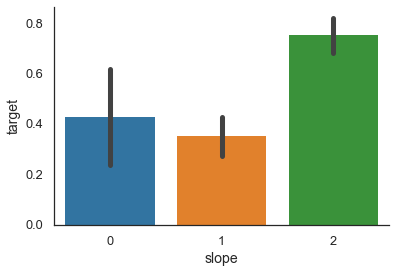

In [30]:
fig = plt.subplots(figsize=(6,4))
sns.set_context('poster', font_scale=0.8)
sns.barplot(df["slope"], df['target']);
sns.despine()

<div class="alert alert-block alert-success">It shows that slope '2' causes heart problems much more than slope '1' and '0'</div>

### Analysing the 'ca' feature

In [31]:
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

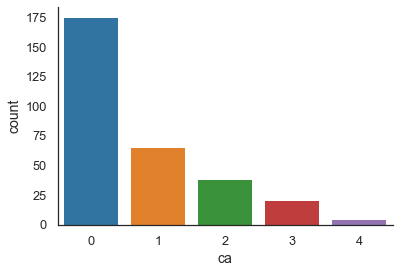

In [32]:
sns.set_context('poster', font_scale=0.8)
sns.countplot(df["ca"])
sns.despine()

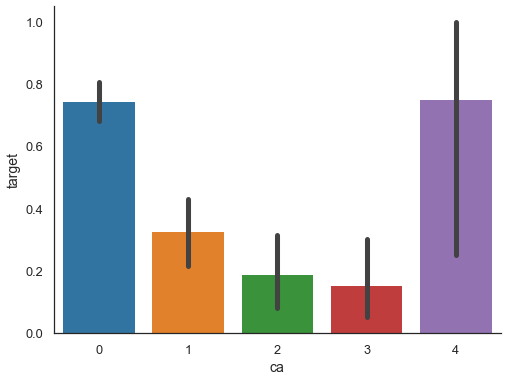

In [33]:
fig = plt.subplots(figsize=(8,6))
sns.barplot(df["ca"], df['target']);
sns.despine()

<div class="alert alert-block alert-success">It shows that ca=4 has an astonishingly large number of heart patients</div>

### Analysing the 'thal' feature

In [34]:
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

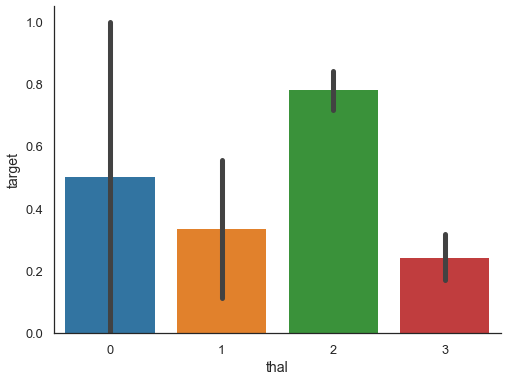

In [35]:
fig = plt.subplots(figsize=(8,6))
sns.set_context('poster', font_scale=0.8)
sns.barplot(df["thal"], df['target']);
sns.despine()

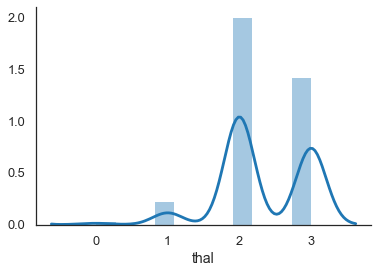

In [36]:
sns.set_context('poster', font_scale=0.8)
sns.distplot(df["thal"]);
sns.despine()

## Splitting Train and Test Data

In [37]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(241, 13)

In [39]:
X_test.shape

(61, 13)

In [40]:
Y_train.shape

(241,)

In [41]:
Y_test.shape

(61,)

## Model Building

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [43]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params,cv=10)

In [44]:
lr_model.fit(X_train,Y_train)

# Printing best parameters choosen through GridSearchCV
lr_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [45]:
predict = lr_model.predict(X_test)

In [46]:
score_lr = round(accuracy_score(Y_test,predict)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %


In [47]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(Y_test,predict))

             precision    recall  f1-score   support

          0       0.88      0.81      0.85        27
          1       0.86      0.91      0.89        34

avg / total       0.87      0.87      0.87        61



#### Confusion Matrix

In [48]:
cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

array([[22,  5],
       [ 3, 31]], dtype=int64)

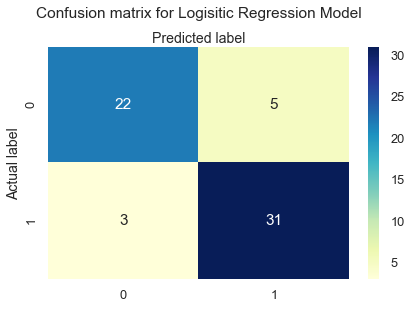

In [49]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Receiver Operating Characterstic(ROC) Curve

In [50]:
#Get predicted probabilites
target_probailities_lr = lr_model.predict_proba(X_test)[:,1]

In [51]:
#Create true and false positive rates
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(Y_test,
                                                             target_probailities_lr)

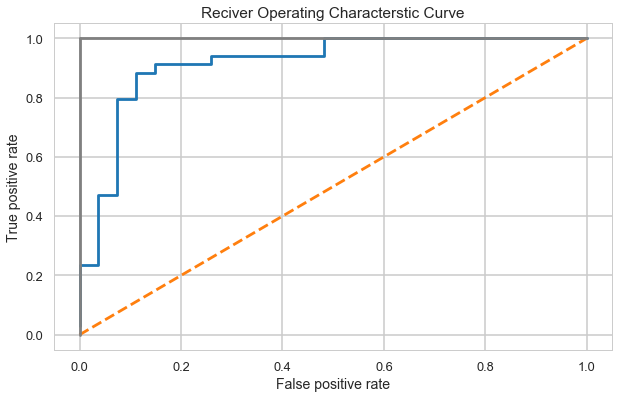

In [52]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [53]:
#Calculate area under the curve
roc_auc_score(Y_test,target_probailities_lr)

0.9172113289760349

### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [55]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 90.16 %


In [56]:
print(classification_report(Y_pred_nb,Y_test))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89        27
          1       0.91      0.91      0.91        34

avg / total       0.90      0.90      0.90        61



#### Confusion Matrix

In [57]:
cnf_matrix = confusion_matrix(Y_test,Y_pred_nb)
cnf_matrix

array([[24,  3],
       [ 3, 31]], dtype=int64)

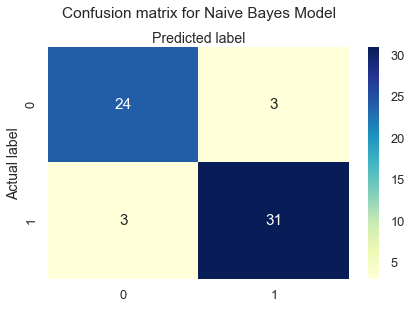

In [58]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(6,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### SVM

In [59]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [60]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


In [61]:
print(classification_report(Y_pred_svm,Y_test))

             precision    recall  f1-score   support

          0       0.81      0.88      0.85        25
          1       0.91      0.86      0.89        36

avg / total       0.87      0.87      0.87        61



### K Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier

results = []
for i in range(1,33):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred_knn=knn.predict(X_test)
    score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
    results.append(score_knn)

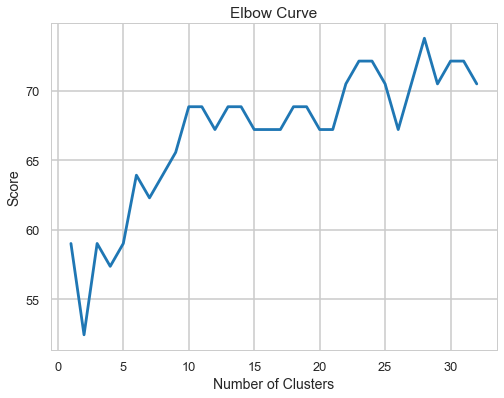

<Figure size 432x288 with 0 Axes>

In [63]:
fig = plt.subplots(figsize=(8,6))
plt.plot(range(1,33),results);
plt.xlabel('Number of Clusters');
plt.ylabel('Score');
plt.title('Elbow Curve');
plt.show();
sns.despine();

In [64]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using K Nearest Neigbor is: "+str(score_knn)+" %")

The accuracy score achieved using K Nearest Neigbor is: 73.77 %


<div class="alert alert-block alert-success">Best k is 28 for this model (73.77 % accuracy) but other models overperforms this model.</div>

#### Confusion Matrix

In [65]:
cnf_matrix = confusion_matrix(Y_pred_knn,Y_test)
cnf_matrix

array([[19,  8],
       [ 8, 26]], dtype=int64)

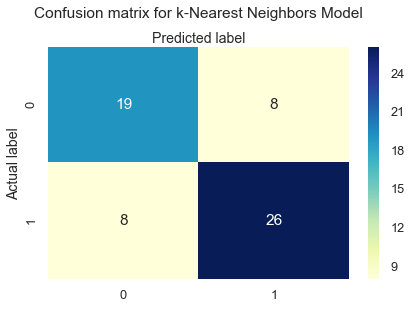

In [66]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [68]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [69]:
tree_model.fit(X_train,Y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2}

In [70]:
predict = tree_model.predict(X_test)

In [71]:
score_dt= round(accuracy_score(Y_test,predict)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


In [72]:
print(classification_report(Y_test,predict))

             precision    recall  f1-score   support

          0       0.72      0.85      0.78        27
          1       0.86      0.74      0.79        34

avg / total       0.80      0.79      0.79        61



#### Confusion Matrix

In [73]:
cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

array([[23,  4],
       [ 9, 25]], dtype=int64)

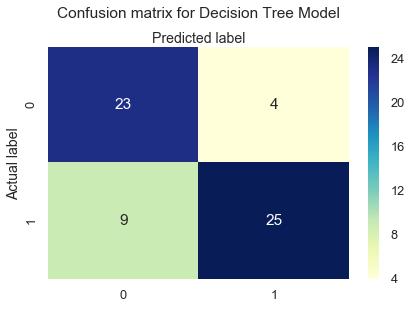

In [74]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### XGBoost

In [75]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [76]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [77]:
print(classification_report(Y_pred_xgb,Y_test))

             precision    recall  f1-score   support

          0       0.85      0.79      0.82        29
          1       0.82      0.88      0.85        32

avg / total       0.84      0.84      0.84        61



### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, Y_train)

estimator = rf.estimators_[1]
feature_names = [i for i in X_train.columns]

Y_train_str = Y_train.astype('str')
Y_train_str[Y_train_str == '0'] = 'no disease'
Y_train_str[Y_train_str == '1'] = 'disease'
Y_train_str = Y_train_str.values

In [79]:
Y_predict = rf.predict(X_test)
Y_pred_quant = rf.predict_proba(X_test)[:, 1]
Y_pred_bin = rf.predict(X_test)

In [80]:
score_rf = round(accuracy_score(Y_pred_bin,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 83.61 %


#### Confusion Matrix

In [81]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_bin)
cnf_matrix

array([[23,  4],
       [ 6, 28]], dtype=int64)

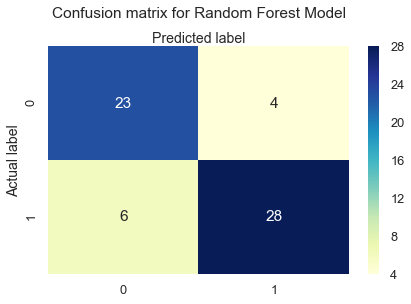

In [82]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [83]:
print(classification_report(Y_pred_bin,Y_test))

             precision    recall  f1-score   support

          0       0.85      0.79      0.82        29
          1       0.82      0.88      0.85        32

avg / total       0.84      0.84      0.84        61



### Output Scores

In [84]:
scores = [score_lr,score_nb,score_svm,score_knn,score_rf, score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using Naive Bayes is: 90.16 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 73.77 %
The accuracy score achieved using Random Forest is: 83.61 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using XGBoost is: 83.61 %


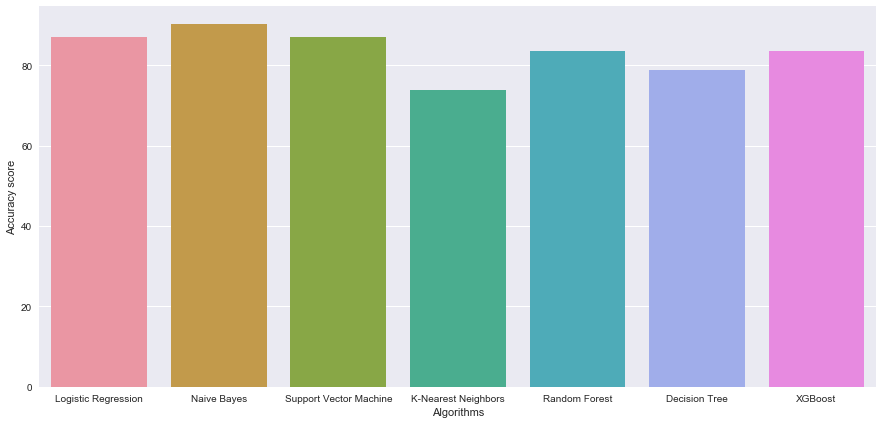

In [85]:
sns.set(rc={'figure.figsize':(15,7)});
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores);

## Conclusion

<div class="alert alert-block alert-success">According to our models, <b>Naive Bayes</b> yields the outstanding scores so it is the best algorithm for our project. Logistic Regression and SVM also showed same performances. On the other hand, K-Nearest Neighbors output the poorest performance with many misclassification. </div>